In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
inflation=pd.read_csv('inflation_1960_1990.csv')

In [4]:
growth_rate=pd.read_csv('gdp_growth_rate.csv',skiprows=4)

In [5]:
growth_rate.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,1.234335,3.493430,3.212471,1.225112,-23.897990,14.730616,10.636431,7.706798,6.810777,NaN
1,Africa Eastern and Southern,AFE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,0.418937,7.937038,5.623764,4.649241,5.138168,...,2.130117,2.677524,2.705194,2.030077,-2.817572,4.578772,3.722717,1.931160,2.763839,NaN
2,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.260314,2.647003,1.189228,3.911603,-2.351101,-20.738839,-6.240172,2.266944,NaN,NaN
3,Africa Western and Central,AFW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,1.869593,3.726090,7.038388,5.364089,4.105339,...,0.194316,2.296349,2.904664,3.281683,-3.730630,2.549691,4.472795,3.662428,4.585674,NaN
4,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.700530,-0.149396,-0.594411,-0.204680,-4.042447,2.102753,4.216003,1.263308,4.423907,NaN


In [6]:
IND=growth_rate.iloc[[109]]

In [7]:
IND

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
109,India,IND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,3.722743,2.931128,5.994353,7.45295,-2.63577,...,8.256306,6.795383,6.453851,3.871437,-5.777725,9.689592,7.609365,9.190755,6.494766,NaN


In [8]:
IND=IND.drop(IND.columns[-1],axis=1)  #alternate df=df.iloc[:,:-1] saving minus the last col

In [9]:
IND=IND.iloc[:,5:]

In [10]:
IND=IND.reset_index(drop=True)

In [11]:
IND_T=IND.T
IND_T.index.name='Year'
IND_T=IND_T.reset_index()
IND_T

,Year,0
0,1961,3.722743
1,1962,2.931128
2,1963,5.994353
3,1964,7.452950
4,1965,-2.635770
...,...,...
59,2020,-5.777725
60,2021,9.689592
61,2022,7.609365
62,2023,9.190755


In [12]:
IND_T.columns=['Year','GrowthRate']

In [13]:
IND_T.head(39)

,Year,GrowthRate
0,1961,3.722743
1,1962,2.931128
2,1963,5.994353
3,1964,7.452950
4,1965,-2.635770
5,1966,-0.055329
6,1967,7.825963
7,1968,3.387929
8,1969,6.539700
9,1970,5.157230


In [14]:
ind_growth_rate99=IND_T.iloc[:39,:]

In [15]:
ind_growth_rate99.to_csv('ind_growth_rate99.csv',index=False)

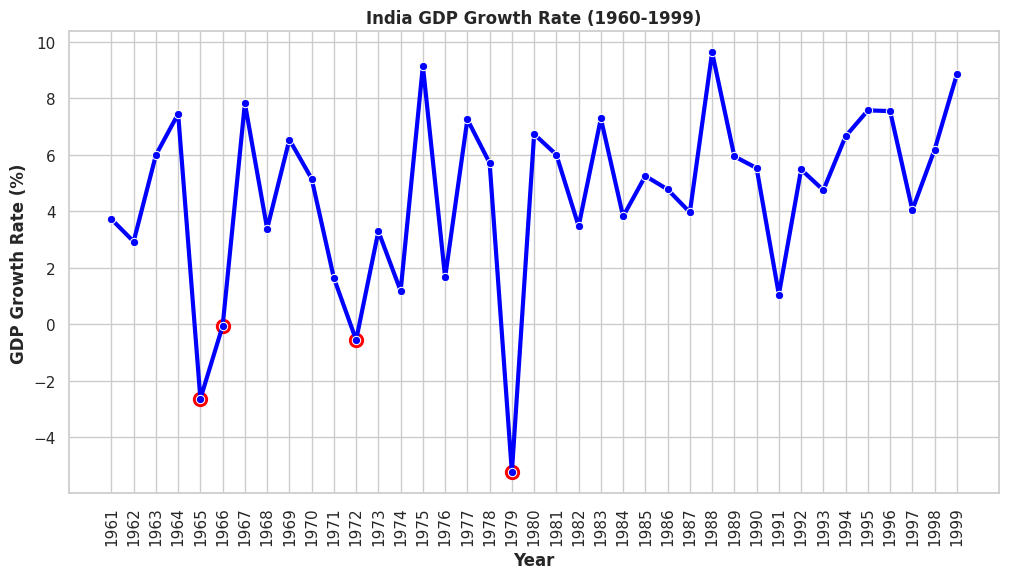

In [16]:

#setting style and ploting line graph
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12,6))
sns.lineplot(x='Year',y='GrowthRate',data=ind_growth_rate99,marker='o',markersize=6,linewidth=3,color='blue')

#highlighting negative years
neg = ind_growth_rate99[ind_growth_rate99['GrowthRate'] < 0]
plt.scatter(neg['Year'], neg['GrowthRate'], color='red', s=100, label='Negative Growth')

#rotating the x Labels 90 degrees
plt.xticks(rotation=90)
plt.xlabel('Year', fontweight='bold', fontsize=12)
plt.ylabel('GDP Growth Rate (%)', fontweight='bold', fontsize=12)
plt.title('India GDP Growth Rate (1960-1999)',fontweight='bold')

# Save as PNG
plt.savefig('India_GDP_Growth.png', dpi=300, bbox_inches='tight')


plt.show()

Above graph shows the gdp growth rate change with respect to years and highlights negative years

In [17]:
Ind_import=pd.read_csv("india_imports1.csv")#total value of import

In [18]:
Ind_import.columns=['Year','Imports']

In [19]:
Ind_import

,Year,Imports
0,1960,2.530503e+09
1,1961,2.337302e+09
2,1962,2.543103e+09
3,1963,2.860203e+09
4,1964,3.210903e+09
...,...,...
59,2019,6.023151e+11
60,2020,5.102447e+11
61,2021,7.609029e+11
62,2022,8.975507e+11


In [20]:
Ind_export=pd.read_csv('india_exports1.csv')

In [21]:
Ind_export.columns=['Year','Exports']

In [22]:
Ind_export

,Year,Exports
0,1960,1.652702e+09
1,1961,1.688402e+09
2,1962,1.757702e+09
3,1963,2.072702e+09
4,1964,2.104202e+09
...,...,...
59,2019,5.292451e+11
60,2020,4.997285e+11
61,2021,6.777693e+11
62,2022,7.780215e+11


In [23]:
Ind_join= pd.merge(Ind_import,Ind_export,on='Year',how='left')
print(Ind_join)

    Year       Imports       Exports
0   1960  2.530503e+09  1.652702e+09
1   1961  2.337302e+09  1.688402e+09
2   1962  2.543103e+09  1.757702e+09
3   1963  2.860203e+09  2.072702e+09
4   1964  3.210903e+09  2.104202e+09
..   ...           ...           ...
59  2019  6.023151e+11  5.292451e+11
60  2020  5.102447e+11  4.997285e+11
61  2021  7.609029e+11  6.777693e+11
62  2022  8.975507e+11  7.780215e+11
63  2023  8.588395e+11  7.794462e+11

[64 rows x 3 columns]


In [24]:
Ind_join['total_trade']=Ind_join['Imports']+Ind_join['Exports']

In [25]:
Ind_join

,Year,Imports,Exports,total_trade
0,1960,2.530503e+09,1.652702e+09,4.183204e+09
1,1961,2.337302e+09,1.688402e+09,4.025704e+09
2,1962,2.543103e+09,1.757702e+09,4.300804e+09
3,1963,2.860203e+09,2.072702e+09,4.932905e+09
4,1964,3.210903e+09,2.104202e+09,5.315105e+09
...,...,...,...,...
59,2019,6.023151e+11,5.292451e+11,1.131560e+12
60,2020,5.102447e+11,4.997285e+11,1.009973e+12
61,2021,7.609029e+11,6.777693e+11,1.438672e+12
62,2022,8.975507e+11,7.780215e+11,1.675572e+12


In [26]:
Ind_join.drop(columns=['Imports','Exports'],inplace=True)


In [27]:
IND_total_trade=Ind_join.iloc[:40,:]

In [28]:
IND_total_trade.head()

,Year,total_trade
0,1960,4.183204e+09
1,1961,4.025704e+09
2,1962,4.300804e+09
3,1963,4.932905e+09
4,1964,5.315105e+09


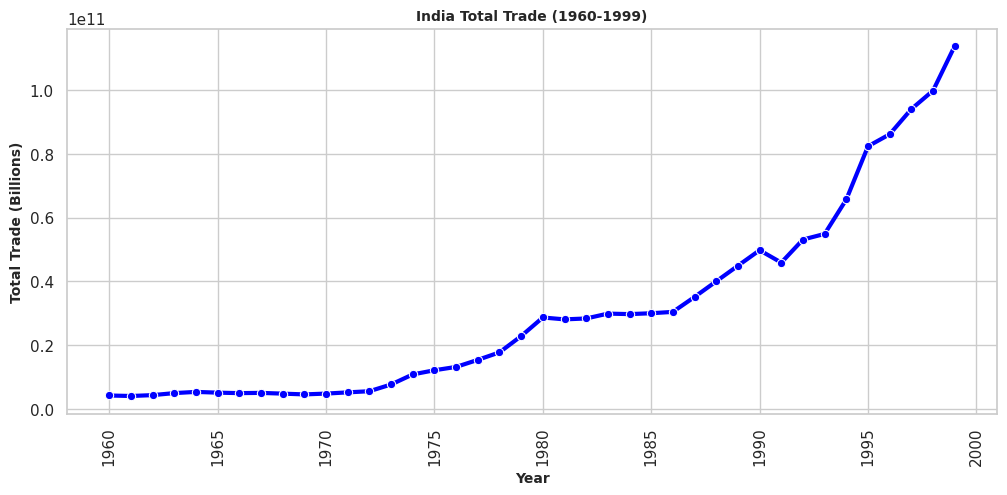

In [59]:

sns.set_theme(style='whitegrid')
plt.figure(figsize=(12,5))
sns.lineplot(x='Year',y='total_trade',data=IND_total_trade,marker='o',linewidth=3,color='blue')

#rotating the x Labels 90 degrees
plt.xticks(rotation=90)
plt.xlabel('Year', fontweight='bold', fontsize=10)
plt.ylabel('Total Trade (Billions)', fontweight='bold', fontsize=10)
plt.title('India Total Trade (1960-1999)',fontweight='bold',fontsize=10)

plt.savefig('India_total_trade.png', dpi=300, bbox_inches='tight')

plt.show()


### GDP per capita (current US$) - China, India 

In [30]:
china_ind=pd.read_csv('china_ind.csv',skiprows=3)

In [31]:
china=china_ind.iloc[[40]]

In [32]:
china=china.iloc[:,5:-1]

In [33]:
china=china.T

In [34]:
china

,40
1961,75.965501
1962,71.061685
1963,74.468154
1964,85.661107
1965,98.668169
...,...
2020,10627.463799
2021,12887.435724
2022,12970.605641
2023,12951.178240


IND_T=IND.T
IND_T.index.name='Year'
IND_T=IND_T.reset_index()
IND_T

In [35]:
china.index.name='Year'
china=china.reset_index()
china=china.iloc[:,:]

In [36]:
china

,Year,40
0,1961,75.965501
1,1962,71.061685
2,1963,74.468154
3,1964,85.661107
4,1965,98.668169
...,...,...
59,2020,10627.463799
60,2021,12887.435724
61,2022,12970.605641
62,2023,12951.178240


In [37]:
china.columns=['Year','GDP_Chn']

In [38]:
china=china.iloc[:40,:]

In [39]:
india=china_ind.iloc[[109]]

In [40]:
india=india.iloc[:,5:-1]

In [41]:
india=india.T #transposing

In [42]:
india.index.name='Year'
india=india.reset_index()

In [43]:
india.columns=['Year','GDP_Ind']

In [44]:
india=india.iloc[:40,:]

In [45]:
india.head()

,Year,GDP_Ind
0,1961,87.853861
1,1962,92.199958
2,1963,103.435021
3,1964,117.856431
4,1965,121.508319


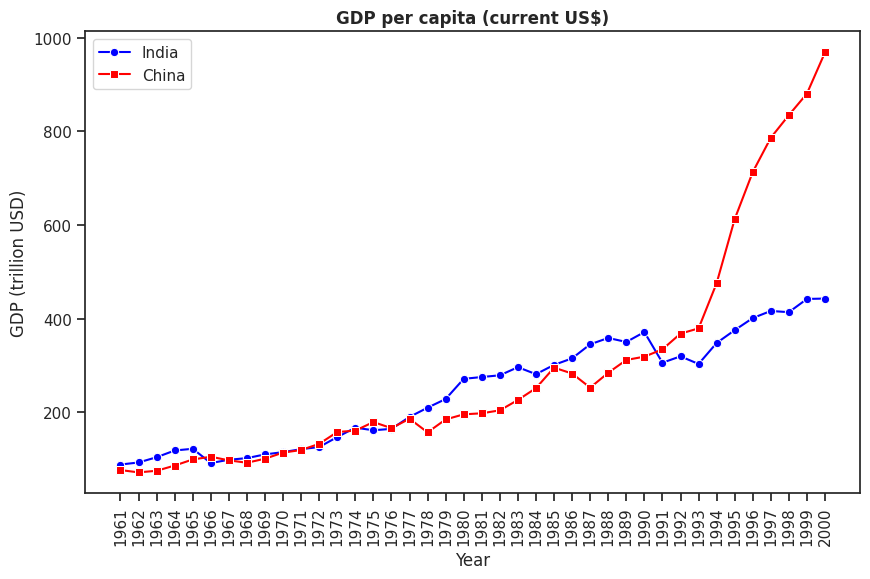

In [46]:
#ploting

sns.set_theme(style='ticks')
plt.figure(figsize=(10,6))
# Plot India
sns.lineplot(x='Year', y='GDP_Ind', data=india, label='India', marker='o',color='blue')

# Plot China
sns.lineplot(x='Year', y='GDP_Chn', data=china, label='China', marker='s',color='red')

plt.title('GDP per capita (current US$)',fontweight='bold')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('GDP (trillion USD)')

plt.savefig('India_China.png', dpi=300, bbox_inches='tight')
plt.legend()
plt.show()

In [47]:
#world trade data 
world_trade=pd.read_csv('world_trade.csv')

In [48]:
world_trade.head()

,Year,Trade_in_Billions
0,1950,62.925
1,1951,86.035
2,1952,84.860
3,1953,84.440
4,1954,87.750


In [49]:
IND_total_trade.head()

,Year,total_trade
0,1960,4.183204e+09
1,1961,4.025704e+09
2,1962,4.300804e+09
3,1963,4.932905e+09
4,1964,5.315105e+09


In [50]:
India_World= pd.merge(IND_total_trade,world_trade,on='Year',how='left')
India_World.head()

,Year,total_trade,Trade_in_Billions
0,1960,4.183204e+09,133.610
1,1961,4.025704e+09,139.280
2,1962,4.300804e+09,146.760
3,1963,4.932905e+09,160.185
4,1964,5.315105e+09,179.280


In [51]:
India_World.columns=['Year','India','World']

In [52]:
India_World.head()

,Year,India,World
0,1960,4.183204e+09,133.610
1,1961,4.025704e+09,139.280
2,1962,4.300804e+09,146.760
3,1963,4.932905e+09,160.185
4,1964,5.315105e+09,179.280


In [53]:
India_World['India']=(India_World['India']/10**9)

In [54]:
India_World['Percentage']=round((India_World['India']/India_World['World'])*100,2)

In [64]:
India_World=India_World.iloc[9:,:]

/tmp/ipykernel_5267/4236318493.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


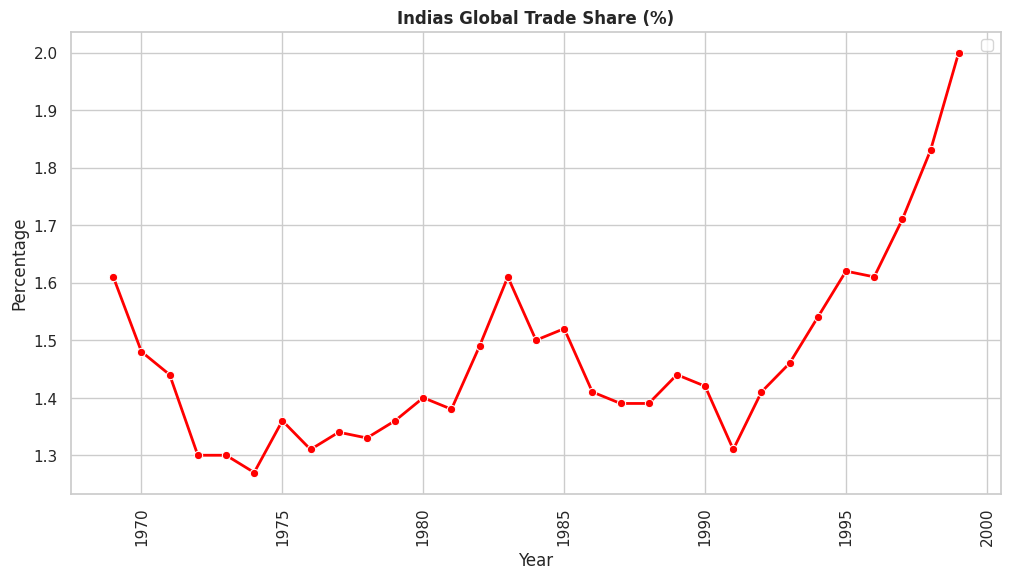

In [65]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(12,6))
sns.lineplot(x='Year',y='Percentage',data=India_World,marker='o',linewidth=2,color='red')

#x and y axis 
plt.title('Indias Global Trade Share (%)',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Percentage')

plt.xticks(rotation=90)

plt.savefig('Indias global trade share', dpi=300, bbox_inches='tight')
plt.legend()
plt.show()


## Output gap